<a href="https://colab.research.google.com/github/rmanicav/21Days-21Projects-MachineLearning/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Project 5: Customer Segmentation with Clustering 🛍️
Project Objective: To use unsupervised machine learning to identify distinct groups of customers within a mall's
dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich,
actionable insights to the marketing team for highly targeted campaigns.
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('darkgrid')

In [ ]:
# Load the dataset from the user-provided file
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

fatal: destination path 'Datasets' already exists and is not an empty directory.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#EDA
#Part 1
#1 describe
df.describe()
#Get count number of rows
print("\nThe number of rows ", df.shape[0])

#2 Info
df.info()

#3 missing values
print(df.isnull().sum()) # no missing values

#Remove columns not needed for clustering
#check if column exists before drop
if 'CustomerID' in df.columns:
    df = df.drop(['CustomerID'], axis=1)
else:
    print("Column 'CustomerID' not found in the DataFrame.")
print(df.describe())


The number of rows  200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Column 'CustomerID' not found in the DataFrame.
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000         

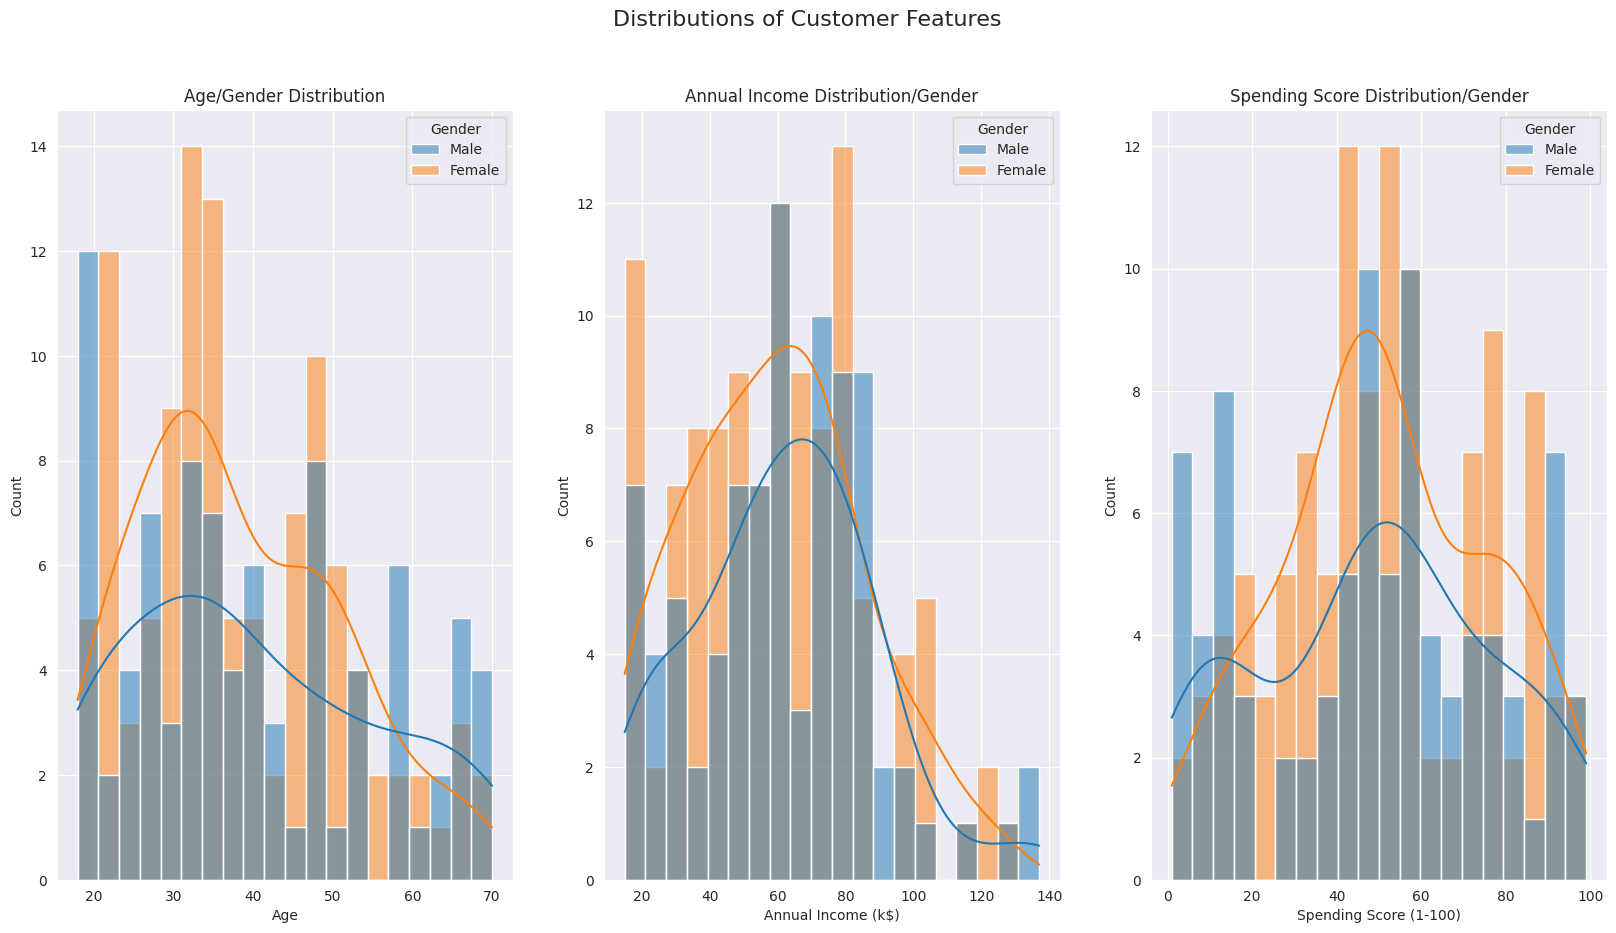

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age/Gender Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution/Gender')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution/Gender')


plt.show()

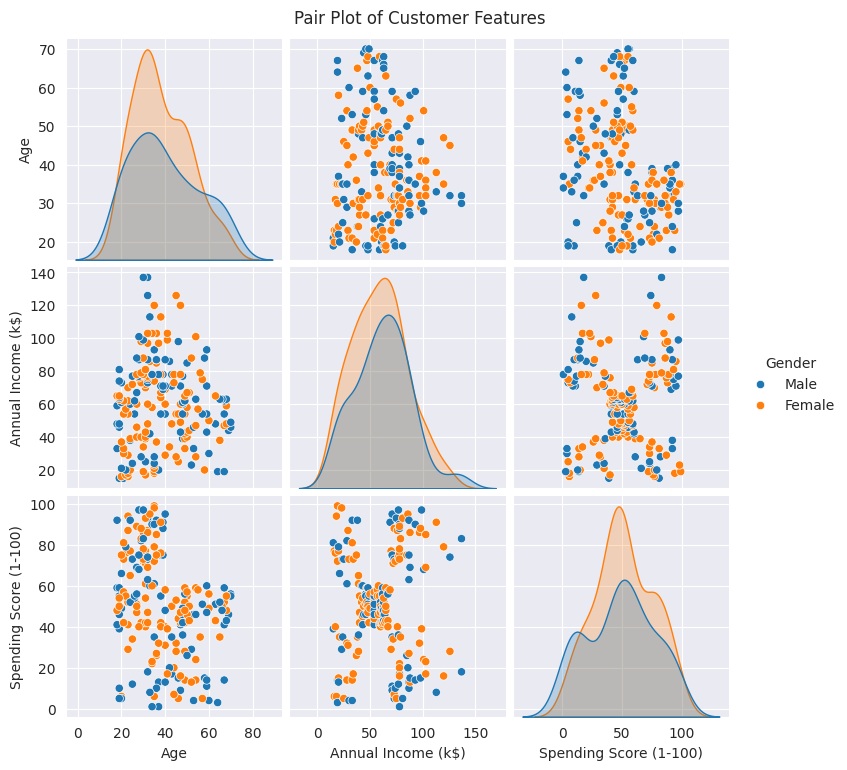

In [ ]:
#Bi variate analysis
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [ ]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

In [ ]:
fig = px.histogram (df,
             x='Age',
             y='Annual Income (k$)',
             title='Annual Income Distribution by Age')
fig.show()



In [ ]:
fig = px.histogram (df,
             x='Age',
             y='Spending Score (1-100)',
             title='Spending by Age')
fig.show()

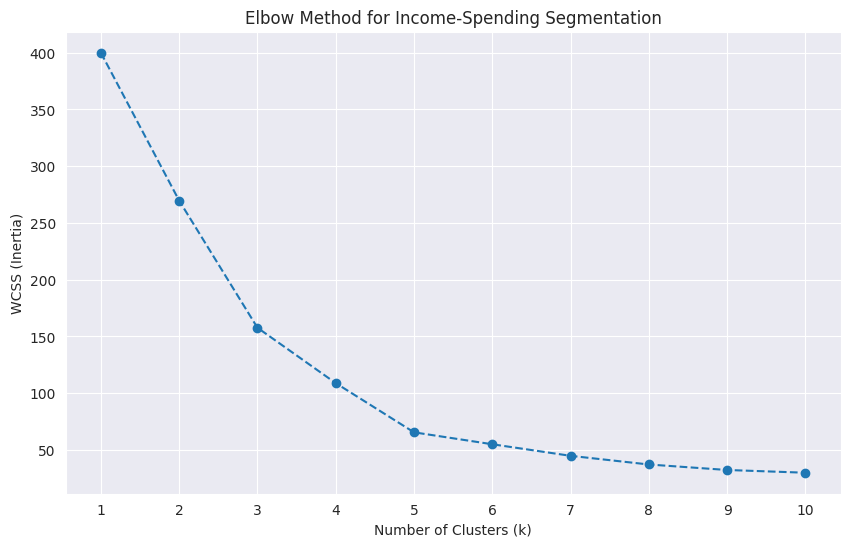

In [ ]:
#Step 3: Segmentation Model 1 - Income & Spending Score
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scalerone = StandardScaler()
X1_scaled = scalerone.fit_transform(X1)

# 2. Implement the Elbow Method
#Within-Cluster Sum of Squares (WCSS)
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()


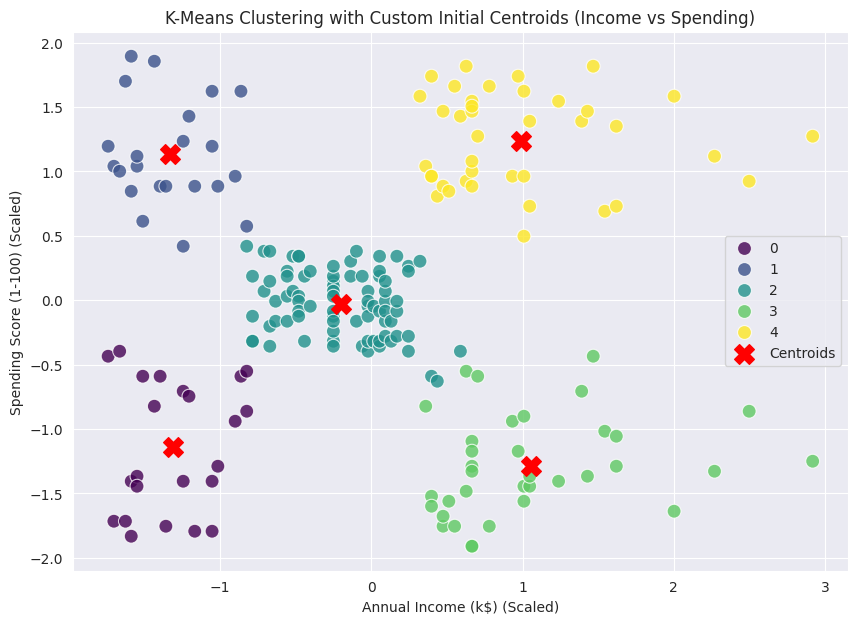

Custom Initial Centroids:
[[-1.5 -1.5]
 [-1.5  1.5]
 [ 0.   0. ]
 [ 1.5 -1.5]
 [ 1.5  1.5]]

Final Centroids after clustering:
[[-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [ 0.99158305  1.23950275]]


In [ ]:
# 4. Perform K-Means with custom initial centroids
n_clusters = 5 # Based on the Elbow Method from the previous step

# Define custom initial centroids (scaled values)
# These are illustrative and chosen to represent potential cluster centers
initial_centroids = np.array([
    [-1.5, -1.5], # Low Income, Low Spending
    [-1.5,  1.5], # Low Income, High Spending
    [ 0.0,  0.0], # Mid Income, Mid Spending
    [ 1.5, -1.5], # High Income, Low Spending
    [ 1.5,  1.5]  # High Income, High Spending
])

kmeans_custom_init = KMeans(n_clusters=n_clusters, init=initial_centroids, random_state=42, n_init=1)
kmeans_custom_init.fit(X1_scaled)

# Add cluster labels to the scaled data
X1_scaled_df = pd.DataFrame(X1_scaled, columns=['Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled'])
X1_scaled_df['Cluster'] = kmeans_custom_init.labels_

# Get the final centroids
final_centroids = kmeans_custom_init.cluster_centers_

# Visualize the clusters and centroids
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=X1_scaled_df,
    x='Annual Income (k$)_scaled',
    y='Spending Score (1-100)_scaled',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.scatter(
    final_centroids[:, 0],
    final_centroids[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroids'
)
plt.title('K-Means Clustering with Custom Initial Centroids (Income vs Spending)')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

print("Custom Initial Centroids:")
print(initial_centroids)
print("\nFinal Centroids after clustering:")
print(final_centroids)


In [ ]:
# Build and fit the final model
#cluster =5 determined from elbow method, used #4
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

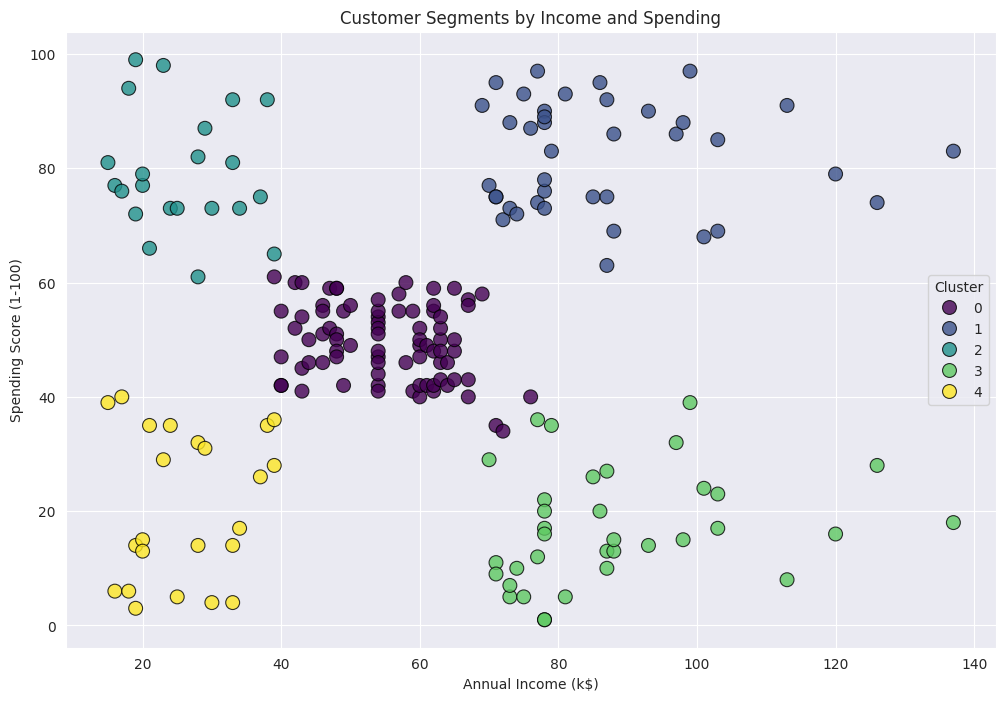

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


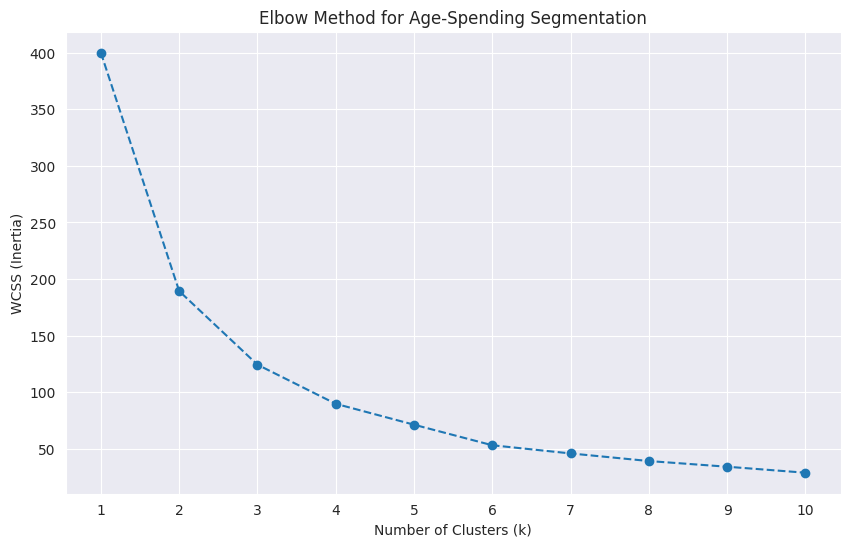

In [ ]:
#Step 4: Segmentation Model 2 - Age & Spending Score
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

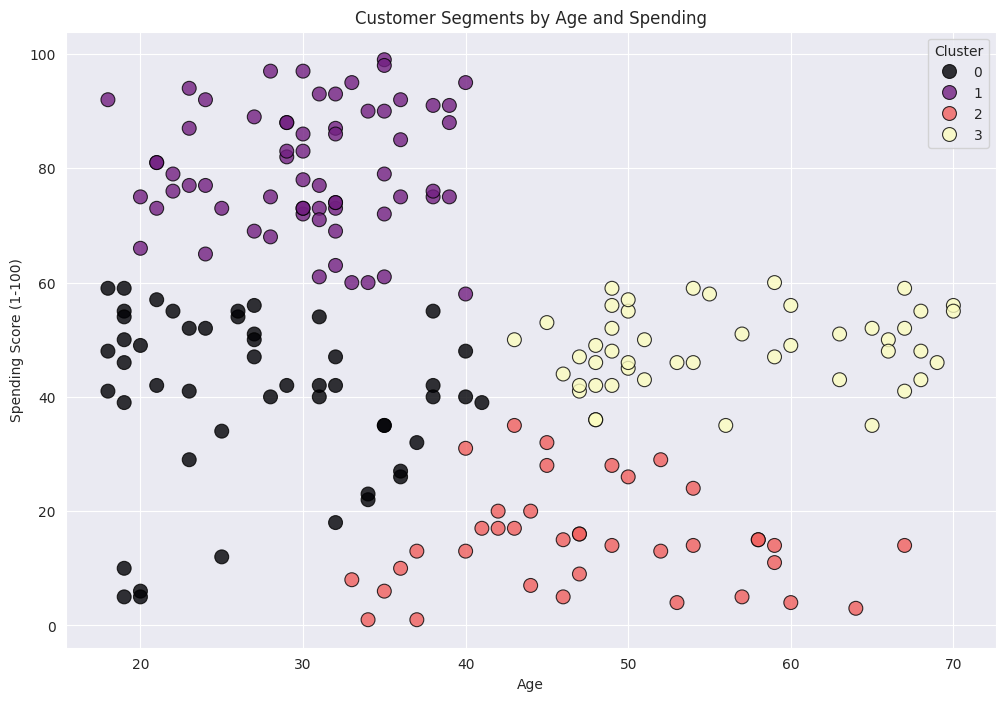

In [ ]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

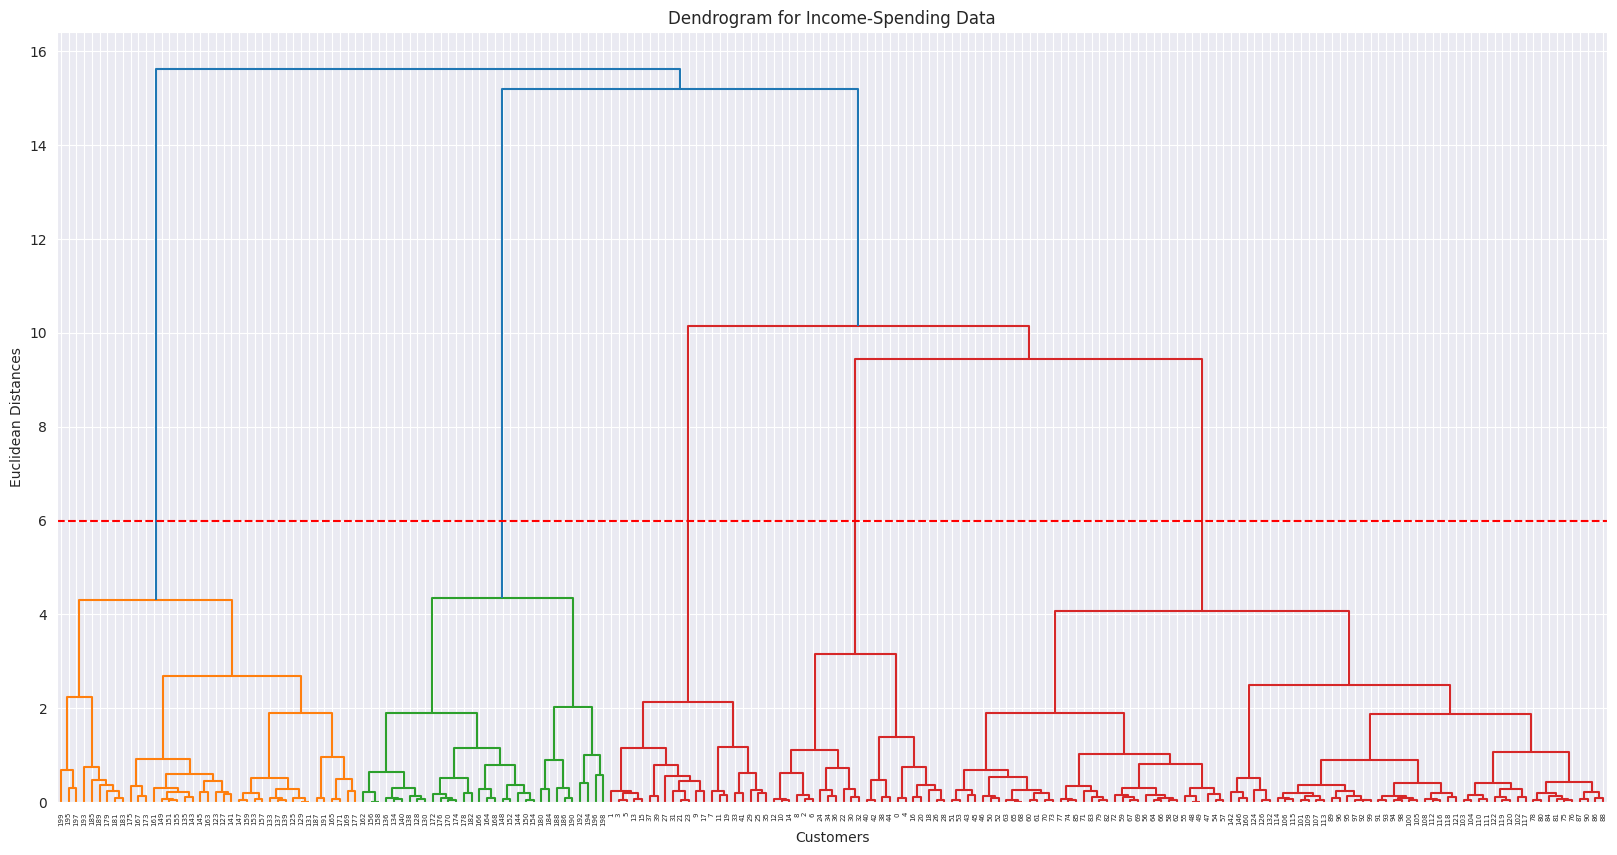

In [ ]:
#Step 5: An Alternative Method - Hierarchical Clustering
#Hierarchical Clustering doesn't require us to specify the number of clusters beforehand. It builds a tree-like hierarchy of clusters
#The dendrogram shows how clusters are merged (or split).
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

In [ ]:
'''
#1 Explore Gender vs. Spending Score: Analyze the relationship between 'Gender' and 'Spending Score (1-100)'
to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
'''

fig = px.histogram (df,
             x='Gender',
             y='Spending Score (1-100)',
             title='Gender and Spending Score (1-100)')
fig.show()

#mean score by gender, add table and graph
print(df.groupby('Gender')['Spending Score (1-100)'].mean())
# plot mean , color green
fig = px.bar(df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index(),
             x='Gender',
             y='Spending Score (1-100)',
             title='Mean Spending Score by Gender',
             )
fig.show()


#standard deviation by gender
print(df.groupby('Gender')['Spending Score (1-100)'].std())
#plot standard deviation
fig = px.bar(df.groupby('Gender')['Spending Score (1-100)'].std().reset_index(),
             x='Gender',
             y='Spending Score (1-100)',
             title='Standard Deviation of Spending Score by Gender')
fig.show()

#max and min score by gender
print(df.groupby('Gender')['Spending Score (1-100)'].agg(['max', 'min']))


Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


Gender
Female    24.11495
Male      27.89677
Name: Spending Score (1-100), dtype: float64


        max  min
Gender          
Female   99    5
Male     97    1


**Analysis of the 'Gender' vs. 'Spending Score (1-100)' relationship:**



1.   Mean Spending Score: Females exhibit a slightly higher average spending score (51.53) compared to males (48.51).
2.   Spending Score Distribution and Variability: The distributions, as seen in the histograms and supported by standard deviation figures, indicate that while female spending is slightly higher on average, their spending scores are less varied (standard deviation: 24.11) than those of males (standard deviation: 27.90). This suggests that male spending habits cover a broader spectrum, including both very low and very high spending individuals.
3. Range of Spending: Both genders show a wide range of spending scores, with females having a maximum of 99 and a minimum of 5, and males ranging from 1 to 97. The male group appears to have more instances at the extreme lower end.

In conclusion, **although female customers have a marginally higher average spending score, the male customer segment demonstrates a greater diversity in their spending patterns.**

In [ ]:

'''
#2 Apply Feature Engineering for Clustering: Create a new feature using existing data (Feature Engineering).
Then, explore if clustering can be effectively performed using this newly engineered feature in combination
with one or more existing features. Document the feature engineering process, the chosen features for clustering,
the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster
visualization and interpretation.
'''

In [ ]:
#get describe
# remove customer id
df = df.drop(['CustomerID'], axis=1)

df_desc = df.describe()
print(df_desc)

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [ ]:
print(df.head(5))
print(df.info())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [ ]:
#Calculate a new feature, 'Spending_to_Income_Ratio', by dividing 'Spending Score (1-100)' by 'Annual Income (k$)'.
df['Spending_to_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
print("New feature 'Spending_to_Income_Ratio' created successfully.")
print(df.head())

New feature 'Spending_to_Income_Ratio' created successfully.
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0    Male   19                  15                      39   
1    Male   21                  15                      81   
2  Female   20                  16                       6   
3  Female   23                  16                      77   
4  Female   31                  17                      40   

   Spending_to_Income_Ratio  
0                  2.600000  
1                  5.400000  
2                  0.375000  
3                  4.812500  
4                  2.352941  


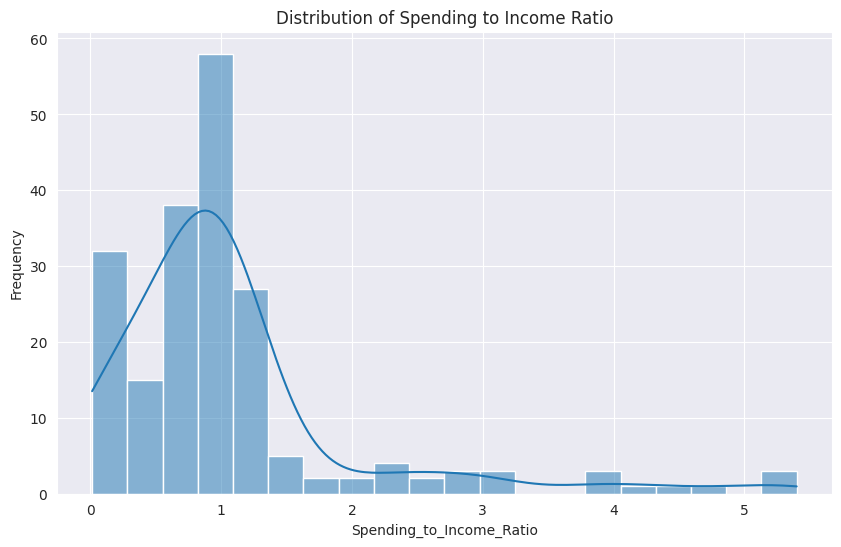

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending_to_Income_Ratio'], kde=True, bins=20)
plt.title('Distribution of Spending to Income Ratio')
plt.xlabel('Spending_to_Income_Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 1. Select the features for clustering
#  'Age' and the new 'Spending_to_Income_Ratio' feature combination
X3 = df[['Age', 'Spending_to_Income_Ratio']]

# 2. Initialize a StandardScaler object
scaler3 = StandardScaler()

# 3. Fit and transform the features
X3_scaled = scaler3.fit_transform(X3)

print("Selected features 'Age' and 'Spending_to_Income_Ratio' have been scaled successfully.")
print(f"Shape of original features (X3): {X3.shape}")
print(f"Shape of scaled features (X3_scaled): {X3_scaled.shape}")

Selected features 'Age' and 'Spending_to_Income_Ratio' have been scaled successfully.
Shape of original features (X3): (200, 2)
Shape of scaled features (X3_scaled): (200, 2)


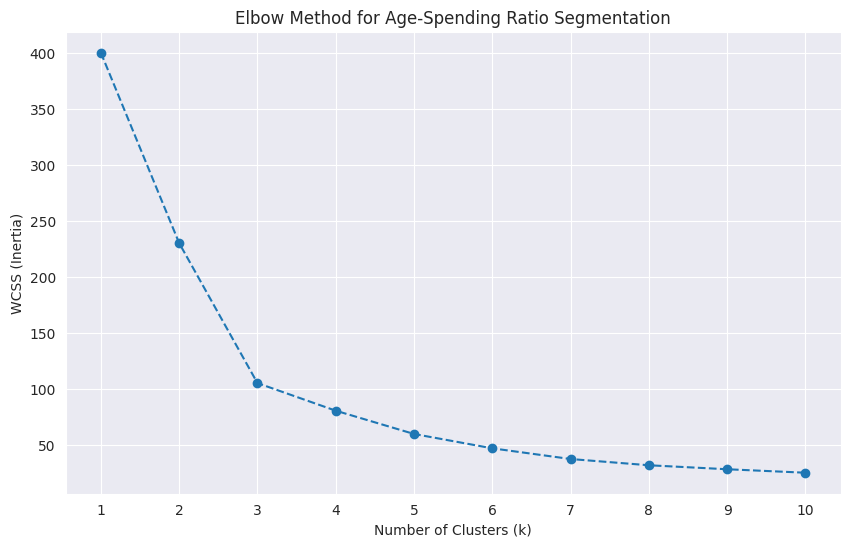

In [ ]:
# perform elbow method to identify the most appropriate number of clusters
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss3.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Ratio Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

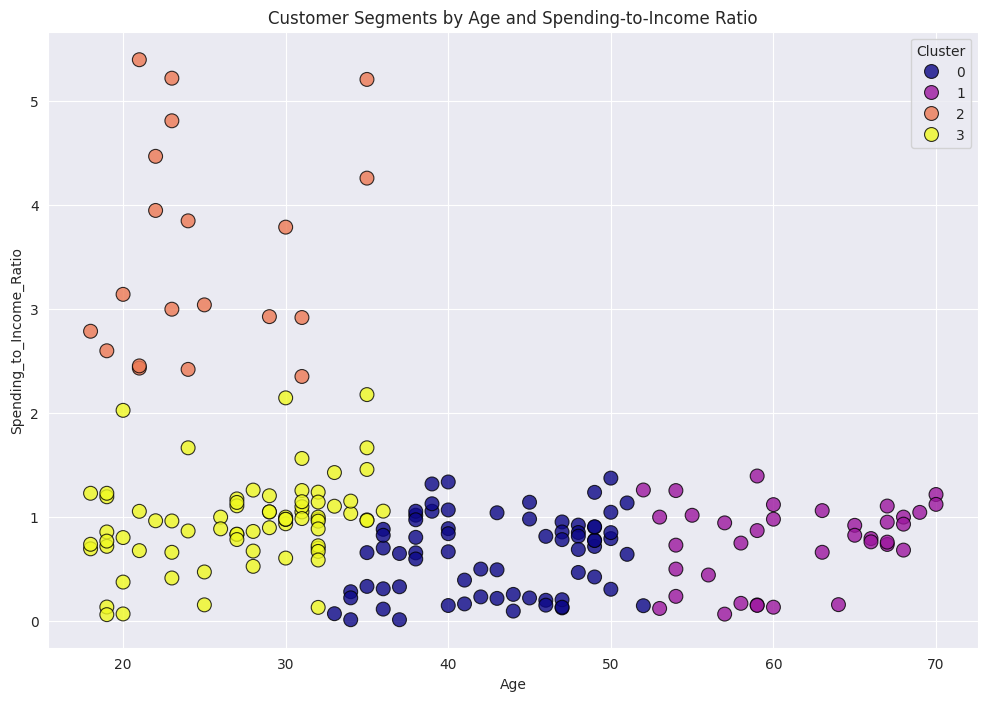


--- Age-Spending Ratio Cluster Profiles ---
                              Age  Annual Income (k$)  Spending Score (1-100)  \
Age_Spending_Ratio_Cluster                                                      
0                           42.94               67.93                   39.13   
1                           61.19               52.84                   37.65   
2                           24.85               23.00                   77.55   
3                           27.44               67.70                   59.68   

                            Spending_to_Income_Ratio  Size  
Age_Spending_Ratio_Cluster                                  
0                                               0.64    70  
1                                               0.76    37  
2                                               3.55    20  
3                                               0.96    73  


In [ ]:
# Optimal number of clusters from Elbow Method using the above plot
n_clusters = 4

kmeans3 = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['Age_Spending_Ratio_Cluster'] = kmeans3.fit_predict(X3_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending_to_Income_Ratio',
                hue='Age_Spending_Ratio_Cluster', palette='plasma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending-to-Income Ratio')
plt.xlabel('Age')
plt.ylabel('Spending_to_Income_Ratio')
plt.legend(title='Cluster')
plt.show()

# Generate quantitative profiles for each cluster
cluster_profiles3 = df.groupby('Age_Spending_Ratio_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending_to_Income_Ratio']].mean().round(2)
cluster_profiles3['Size'] = df['Age_Spending_Ratio_Cluster'].value_counts()
print("\n--- Age-Spending Ratio Cluster Profiles ---")
print(cluster_profiles3)


Please see below for analysis on clustering based on Age and Spending-to-income Ratio

**Cluster 0 :**
1) Age: Middle-aged (average 42.94 years).
2) Annual Income: Above average (average 67.93 k$).
3) Spending Score: Below average (average 39.13).
4) Spending-to-Income Ratio: Moderate (0.64).
Inference: These are likely established customers with stable incomes who are somewhat cautious spenders relative to their income. They are not chasing high spending scores.

**Cluster 1 :**
1) Age: Older demographic (average 61.19 years).
2) Annual Income: Average (average 52.84 k$).
3) Spending Score: Below average (average 37.65).
4) Spending-to_Income Ratio: Moderate to slightly high (0.76).
Inference: This group consists of older customers with average income and relatively low spending habits. Their spending-to-income ratio is slightly higher than Cluster 0, possibly indicating they are more mindful of their spending in retirement or on fixed incomes.

**Cluster 2 :**
1) Age: Youngest demographic (average 24.85 years).
2) Annual Income: Lowest income (average 23.00 k$).
3) Spending Score: Very high (average 77.55).
4) Spending-to-Income Ratio: Extremely high (3.55).
Inference: This is a small but distinctive group of young, low-income individuals with very high spending scores, leading to an exceptionally high spending-to-income ratio. They might be impulse buyers, heavily credit-dependent, or spending a significant portion of their limited income at the mall. These could be students or young professionals just starting out.

**Cluster 3 :**

1) Age: Young to middle-aged (average 27.44 years).
2) Annual Income: Above average (average 67.70 k$).
3) Spending Score: Above average (average 59.68).
4) Spending-to-Income Ratio: Moderate (0.96).
Inference: This is the largest group, characterized by younger customers with good incomes and healthy spending habits. Their spending score and income are both above average, and their spending-to-income ratio indicates a balanced approach where they spend a good portion of their income. These are likely career-focused individuals with disposable income.

Summary of Insights:

1) The clustering reveals distinct segments based on age and how they manage their spending relative to their income.
2) Cluster 2 stands out as a high-risk/high-reward group: young customers with low income but very high spending, suggesting potential for loyalty if managed well, or risk of default if not.
3) Clusters 0 and 1 represent more conservative or older spenders
4)Cluster 3 includes younger, more affluent spenders.